# Imports/utility functions

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import gc, os, cna, warnings
import scanpy as sc
import vima.data.samples as vds
import vima.data.patchcollection as vdp
import vima.vis as vv
import seaborn as sns
from PIL import Image
fs_axislabel = 10
fs_figsubpanel = 14
fs_legend = 8

# Prepare

## read data

In [2]:
d = cna.read('_results/default-vae.h5ad'); d.sampleid = 'sid'
d_tnf = cna.read('_results/default-vae-tnf.h5ad'); d_tnf.sampleid = 'sid'

In [3]:
patchsize = 40; patchstride = 10

# read in samples
def fname_parser(fname):
    fname = fname.split('/')[-1].split('.nc')[0]
    return {
        'donor': fname.split('_')[0].replace('Repeat',''),
        'sid': fname
    }
repname = 'pca_k=10_harmony'
samples = vds.read_samples(f'../../UC/UC-data/10u/{repname}/*.nc', fname_parser)

P = vdp.PatchCollection(
    vds.choose_patches(samples, patchsize, patchstride, max_frac_empty=0.8),
                        samples, standardize=True)
sid_nums = {sid:sid_num for sid, sid_num in P.meta[['sid','sid_num']].drop_duplicates().values}

# choose which patches to do case/ctrl analysis on
Pdense = vdp.PatchCollection(
    vds.choose_patches(samples, patchsize, patchstride, max_frac_empty=0.5),
                        samples, sid_nums=sid_nums, standardize=True)

100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 16.58it/s]


in pytorch mode
means: [ 0.10415029  0.03282368 -0.01539001 -0.05837966 -0.05422228  0.00433646
  0.00879655 -0.09059635  0.01674946  0.04970083]
stds: [2.775773   1.616454   1.5301366  0.9860061  0.70636934 0.69481075
 0.8570151  0.7095395  0.8510643  0.701797  ]
data augmentation is off


100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 19.32it/s]


in pytorch mode
means: [ 0.08236215  0.01278621 -0.03404611 -0.06953703 -0.06288487 -0.0014956
  0.01076894 -0.10601478  0.00874194  0.04395451]
stds: [2.9123883  1.7138957  1.6142913  1.0410864  0.7508265  0.7380691
 0.9016667  0.75130934 0.8896473  0.7415352 ]
data augmentation is off


## colormaps

100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 16.16it/s]


in pytorch mode
means: [ 0.01689828  0.00150796  0.00527156  0.00536179  0.00563719  0.00035608
 -0.00802938  0.0043248   0.00094679 -0.00433566  0.01283921  0.00946009
 -0.00271181  0.00814204 -0.00313907 -0.01111851  0.0038142  -0.00495441
 -0.00788324 -0.0102378   0.00479424 -0.0059294  -0.01485561  0.00210627
 -0.00212272 -0.00110616  0.0033444  -0.01055621 -0.01013428 -0.00696178
 -0.00996795 -0.00920216 -0.00575524  0.00360769 -0.00498684 -0.00193264
  0.01543991  0.00874063  0.02084183  0.00249136 -0.00681594  0.00046659
  0.00293388 -0.00612239  0.00206281  0.00428624 -0.00389618  0.00339744
  0.01089315 -0.00309261 -0.00417705  0.00389772]
stds: [0.84981024 0.84907097 0.8569953  0.8568293  0.8528206  0.8390457
 0.8614314  0.8590168  0.8541651  0.8538817  0.8464149  0.86265886
 0.84715694 0.8548318  0.84848994 0.8604322  0.86220413 0.8464211
 0.8523365  0.848968   0.86137855 0.8514823  0.845759   0.8589614
 0.83589804 0.8551714  0.84951574 0.85444313 0.8479004  0.85674113
 0.83

100%|███████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 17.12it/s]


in pytorch mode
means: [ 0.03450051  0.01001776  0.01028677  0.01651129  0.0106239   0.00421137
 -0.0110694   0.01175604  0.00527095  0.00281024  0.01756178  0.02482065
  0.00535714  0.02846373 -0.00391646 -0.03117749  0.01700032 -0.00614299
 -0.01147513 -0.00734436  0.00456288 -0.00182587 -0.02725933  0.00425444
  0.00423985  0.00520893  0.01100909 -0.0074923  -0.00760795 -0.01673635
 -0.00456428 -0.00128556  0.00149652  0.01620224 -0.00015877 -0.00541806
  0.03646662  0.0306184   0.03350268  0.01022904 -0.00281849 -0.00035324
  0.01265466 -0.01766085 -0.00101377  0.01631876 -0.00075639  0.00843197
  0.0176501   0.00134827 -0.00521398  0.01958132]
stds: [0.8803073  0.89601576 0.91229045 0.8991415  0.90108967 0.8923777
 0.91099787 0.91085744 0.89770836 0.9031257  0.8894334  0.9167315
 0.88881934 0.9007439  0.88637507 0.8969165  0.90833366 0.8848747
 0.8969837  0.88856167 0.91489613 0.8978666  0.88527924 0.90511596
 0.86885506 0.89818245 0.8908612  0.8984099  0.8877215  0.902537
 0.8901

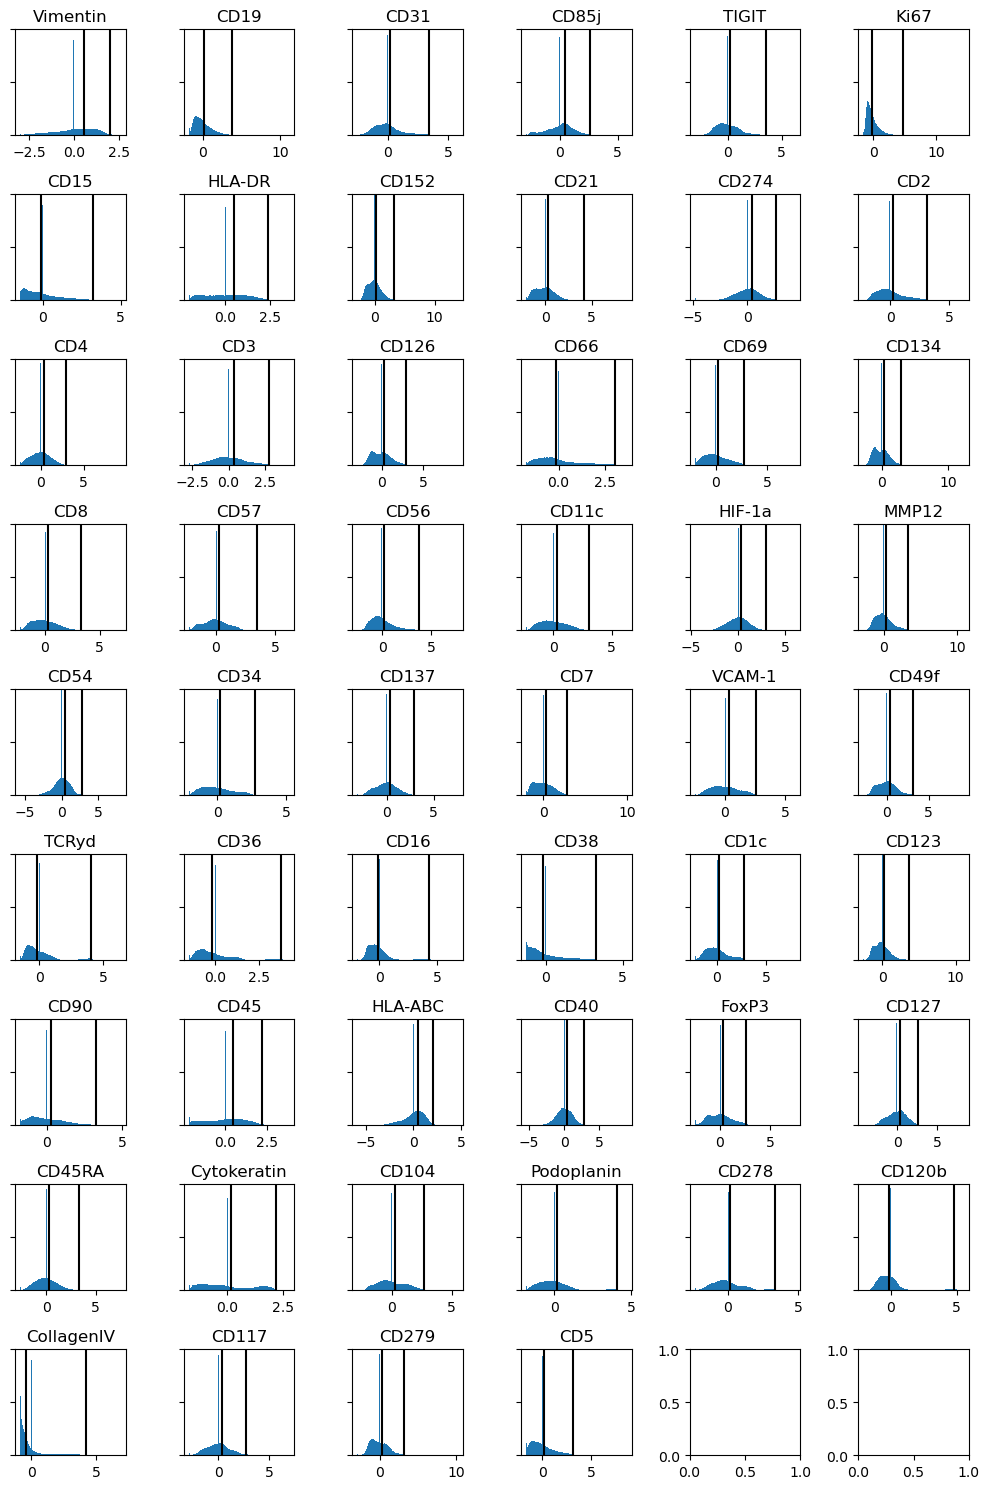

In [4]:
# read in samples
def fname_parser(fname):
    fname = fname.split('/')[-1].split('.nc')[0]
    return {
        'donor': fname.split('_')[0].replace('Repeat',''),
        'sid': fname
    }
samples_m = vds.read_samples(f'../../UC/UC-data/10u/normalized/*.nc', fname_parser)
patchsize = 40; patchstride = 10
M = vdp.PatchCollection(
    vds.choose_patches(samples_m, patchsize, patchstride, max_frac_empty=0.8),
                        samples_m, standardize=True)
Mdense = vdp.PatchCollection(
    vds.choose_patches(samples_m, patchsize, patchstride, max_frac_empty=0.5),
                        samples_m, standardize=True)
markers = list(list(samples_m.values())[0].marker.values)
gc.collect()

# make histogram of all markers
from scipy import stats
def make_hists(pixels, threshs=[60,99]):
    fig, axs = plt.subplots(9,6,figsize=(10,15))
    percentiles = {}
    for i, ax in zip(range(len(markers)), axs.flatten()):
        nums = pixels[:,:,:,i].flatten()
        [a, b] = np.percentile(nums[(nums-stats.mode(nums)[0])**2 > 0.01], threshs)
        percentiles[markers[i]] = [a,b]
        ax.hist(nums, bins=100)
        ax.set_title(markers[i]); ax.set_yticklabels([]); ax.set_ylim(0,200000)
        ax.axvline(a, color='k'); ax.axvline(b, color='k')
    plt.tight_layout(); plt.show()
    return percentiles

# use histograms of each marker to define scaling functions used to determine color intensities
M.numpy_mode()
Mdense.numpy_mode()
raw_percentiles = make_hists(M[::50][0])
raw_scalers = {
    m : vv.scaler(raw_percentiles[m][0],raw_percentiles[m][1])
    for m in markers}

In [5]:
#define colormaps
tbf_cmap = [
    [markers.index(m), c, raw_scalers[m]]
    for m, c in zip(['CD3', 'CD19', 'MMP12'],
                    np.array([[0,1,0],[1,0,0],[0,0,1]]) * \
                    np.array([[1],[1],[1]]))]

In [6]:
#define patch-wide marker avgs and covs
Mdense.numpy_mode()
Mdense_avg = Mdense[:][0].mean(axis=(1,2))
Mdense_std = Mdense[:][0].std(axis=(1,2))
Mdense_unrolled = ((Mdense[:][0] - Mdense_avg[:,None,None,:])/Mdense_std[:,None,None,:]).reshape((-1,40*40,len(markers)))
ind = np.triu_indices(52)
Mdense_cov_square = np.array([(X.T.dot(X) / len(X)) for X in Mdense_unrolled])
Mdense_cov = np.array([cov[ind] for cov in Mdense_cov_square])
Mdense_cov = pd.DataFrame(data=Mdense_cov,
                          columns=[f'{markers[a]},{markers[b]}' for a, b in zip(*ind)],
                          index=d.obs.index)
Mdense_avg = pd.DataFrame(data=Mdense_avg,
                          columns=markers,
                          index=d.obs.index)

data augmentation is off
in numpy mode


## choose markers for violin plots

In [7]:
uc_vs_ctrl = Mdense_avg[d.obs.ncorr_thresh > 0].median() - Mdense_avg[d.obs.ncorr_thresh < 0].median()
tnf_vs_not = Mdense_avg.loc[d_tnf.obs[d_tnf.obs.ncorr_thresh > 0].index].median() - Mdense_avg.loc[d_tnf.obs[d_tnf.obs.ncorr_thresh < 0].index].median()

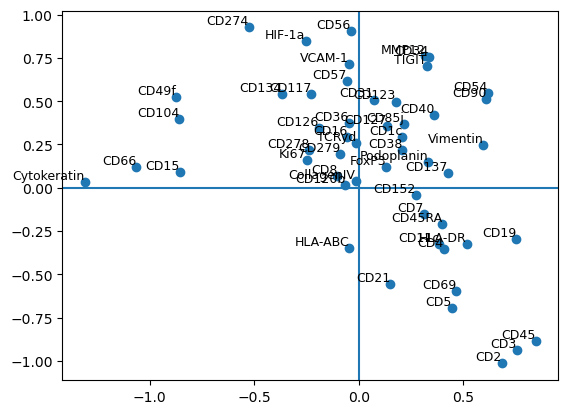

In [8]:
plt.scatter(uc_vs_ctrl, tnf_vs_not)
# Add labels (using the Series index)
for label, x, y in zip(uc_vs_ctrl.index, uc_vs_ctrl.values, tnf_vs_not.values):
    plt.text(x, y, label, fontsize=9, ha='right', va='bottom')  # Adjust alignment if needed
plt.axhline(y=0)
plt.axvline(x=0)
plt.show()

In [9]:
both = pd.DataFrame({'UC':uc_vs_ctrl, 'TNF':tnf_vs_not})
both['interesting'] = np.sign(uc_vs_ctrl)*np.sign(tnf_vs_not) > 0

In [10]:
markers_to_plot = np.array(['CD3','CD45','CD19','CD90','CD34','CD54','MMP12','CD274','HIF-1a'])
markers_to_plot = both.loc[markers_to_plot].sort_values(by='UC', ascending=False).index

# Figure

In [165]:
from importlib import reload; reload(vv)
def umap(ax):
    sc.pl.umap(d, ax=ax, show=False, s=2)
    sc.pl.umap(d[d.obs.ncorr_thresh != 0], color='ncorr_thresh', cmap='seismic', vmin=-1, vmax=1, s=7, ax=ax, show=False,
               colorbar_loc=None, frameon=False, title='')

    p = 0.0006499935000649994
    formatted = f"${p:.1e}"
    formatted_latex = formatted.replace('-0', '-').replace("e", r" \times 10^{").replace("+", "").replace("-", r"-") + "}$"
    ax.text(2.8, -1, f'P={formatted_latex}', ha='left', va='bottom', fontsize=fs_legend, fontweight='medium')

def markerplot(ax, markers_to_plot):
    pos = d.obs.ncorr_thresh > 0
    neg = d.obs.ncorr_thresh <= 0
    vv.diff_markers(pd.DataFrame(Mdense_avg, index=d.obs.index, columns=markers),
                    d.obs[pos].index, d.obs[neg].index, markers_to_plot, sort=False,
                    labels=['UC-associated','Control-associated'], nmarkers=len(markers_to_plot), ascending=False,
                    split=True, inner='quart', density_norm='count', alpha=0.6,
                    ax=ax, show=False,
                    palette={'UC-associated': "red", 'Control-associated': "blue"})
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, title=None)
    ax.set_ylabel('Avg. normalized intensity')
    ax.set_yticks([-2, 0, 2])
    ax.set_xlabel('')
    ax.axvline(x=2.5, ls='--', color='gray')
    ax.axvline(x=6.5, ls='--', color='gray')
    ax.spines[['right','top']].set_visible(False)

def markerplot_tnf(ax, markers_to_plot):
    pos = d_tnf.obs.ncorr_thresh > 0
    neg = d_tnf.obs.ncorr_thresh < 0
    vv.diff_markers(Mdense_avg,
                    d_tnf.obs[neg].index, d_tnf.obs[pos].index, markers_to_plot, sort=False,
                    labels=['Non-TNFi-associated', 'TNFi-associated'], nmarkers=len(markers_to_plot), ascending=False,
                    ax=ax, show=False,
                    split=True, inner='quart', density_norm='count', alpha=0.6,
                    palette={'TNFi-associated': "orange", 'Non-TNFi-associated': "green"})
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.axvline(x=2.5, ls='--', color='gray')
    ax.axvline(x=6.5, ls='--', color='gray')
    ax.legend(handles, labels, title=None)
    ax.set_ylabel('Avg. normalized intensity', fontsize=fs_axislabel)
    ax.set_xlabel('')
    ax.set_yticks([-2, 0, 2])
    ax.spines[['right','top']].set_visible(False)

from io import BytesIO
from PIL import Image
def clust_examples(ax, mask, cmap, label, nx=3, ny=3, seed=0):
    np.random.seed(seed)
    idx = np.random.choice(np.where(mask)[0], size=nx*ny, replace=False)
    fig = vv.plot_patches_overlaychannels_linsum(
                Mdense[idx][0],
                d.X[idx],
                cmap,
                nx=nx, ny=ny,
                show=False
            )
    fig.patch.set_facecolor('black')
    buff = BytesIO()
    fig.savefig(buff, format="png", bbox_inches="tight", dpi=800)
    plt.close(fig)
    buff.seek(0)
    ax.imshow(Image.open(buff))
    text = ax.text(100, 100, label, fontsize=fs_axislabel, color='black', ha='left', va='top')
    text.set_path_effects([withStroke(linewidth=3, foreground='white')])
    ax.axis('off')

from matplotlib.patheffects import withStroke
from matplotlib.colors import LinearSegmentedColormap
go_cmap = LinearSegmentedColormap.from_list("green_orange_divergent", ["green", "white", "orange"])
def umap_tnf(ax):
    sc.pl.umap(d_tnf, ax=ax, show=False, s=5)
    sc.pl.umap(d_tnf[d_tnf.obs.ncorr_thresh != 0], color='ncorr_thresh', cmap=go_cmap, vmin=-0.4, vmax=0.4, s=15, ax=ax, show=False,
               colorbar_loc=None, frameon=False, title='')

    p = 0.0013799862001379986
    formatted = f"${p:.1e}"
    formatted_latex = formatted.replace('-0', '-').replace("e", r" \times 10^{").replace("+", "").replace("-", r"-") + "}$"
    ax.text(13, -9, f'P={formatted_latex}', ha='left', va='bottom', fontsize=fs_legend, fontweight='medium')

from io import BytesIO
from PIL import Image
def spatialplot(ax, samples, sids, marker, highlight, ncols=5, vmin=-2, vmax=2):
    nrows = int(np.ceil(len(sids)/ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for ax_, sid in zip(axs.flatten(), sids):
        i = np.where(samples[sid].marker == marker)[0][0]
        toplot = samples[sid].sel(marker=marker).data.copy()
        # toplot[toplot == 0] = vmin
        ax_.imshow(toplot, cmap='PuBu', vmin=vmin, vmax=vmax)
        white = np.ones((*toplot.shape, 4))
        white[toplot != 0] = 0
        ax_.imshow(white)

        mypatches = d.obs[d.obs.sid == sid]
        myhighlight = highlight[mypatches.index]
        mask = vds.union_patches_in_sample(mypatches[myhighlight != 0], samples_m[sid])
        boundary = vds.get_boundary(mask.data, [1,0,0,1], thickness=5)
        ax_.imshow(boundary)
        ax_.set_title('Control' if 'HC' in sid else 'UC', fontsize=6)
        ax_.axis('off')
    # fig.patch.set_facecolor('black')
    buff = BytesIO()
    fig.savefig(buff, format="png", bbox_inches="tight", dpi=800)
    plt.close(fig)
    buff.seek(0)
    ax.imshow(Image.open(buff))
    ax.axis('off')

from matplotlib.patches import Rectangle
def small_color_legend(ax, cmap, x=0.05, line_height=0.15, fontsize=14):
    rectangle = Rectangle(
        (0, 0), 1, 1, color='black', zorder=2
    )
    ax.add_patch(rectangle)

    items = [(markers[color[0]], color[1]) for color in cmap]
    for i, (line, color) in enumerate(items):
        ax.text(
            line_height/3,
            1- i * line_height - line_height/3,
            line,
            color=color,
            fontsize=fontsize,
            fontweight='medium',
            va='top',
            ha='left',
            zorder=3
        )
    ax.axis('off')

from matplotlib.colors import to_rgba
def cnascore(ax):
    ct_ = d_tnf.samplem[['tnf_npatches','tnf_npos','tnf_nneg']].fillna(0).copy()
    ct_ = ct_[ct_.tnf_npos + ct_.tnf_nneg >= 10]
    ct_ = ct_.div(ct_.tnf_npatches, axis=0)
    ct_['TNFand'] = (d_tnf.samplem.TNFprior == 'y') & (d_tnf.samplem.TNFnow == 'y')
    ct_['TNFprioronly'] = (d_tnf.samplem.TNFprior == 'y') & (d_tnf.samplem.TNFnow == 'n')
    ct_['TNFnowonly'] = (d_tnf.samplem.TNFprior == 'n') & (d_tnf.samplem.TNFnow == 'y')
    ct_['TNFnever'] = (d_tnf.samplem.TNFprior == 'n') & (d_tnf.samplem.TNFnow == 'n')

    start_color = go_cmap(0)
    end_color = go_cmap(255)
    n_colors = 3
    colors = [
        tuple(np.array(start_color) * (1 - i / (n_colors - 1)) + np.array(end_color) * (i / (n_colors - 1)))
        for i in [0,1.3,2]
    ] 
    
    ax.scatter(ct_[ct_.TNFnever].tnf_nneg, ct_[ct_.TNFnever].tnf_npos, color=colors[0], label='never TNFi')
    ax.scatter(ct_[ct_.TNFnowonly].tnf_nneg, ct_[ct_.TNFnowonly].tnf_npos, color=colors[1], label='new TNFi')
    ax.scatter(ct_[ct_.TNFprioronly].tnf_nneg, ct_[ct_.TNFprioronly].tnf_npos, color=colors[1], edgecolors=colors[2], linewidths=1.5, label='prior TNFi')
    ax.scatter(ct_[ct_.TNFand].tnf_nneg, ct_[ct_.TNFand].tnf_npos, color=colors[2], label='longtime TNFi')
    ax.legend(labelspacing=0.4,  # Reduce vertical spacing between labels
        handlelength=1.0,  # Shorten the marker length
        handletextpad=0.5,  # Reduce space between marker and label
        borderpad=0.4,  # Reduce padding around the edges
        fontsize=fs_legend)  # Adjust font size (optional))
    ax.set_xlabel('%Not TNFi patches', fontsize=fs_axislabel, labelpad=-5)
    ax.set_ylabel('%TNFi patches', fontsize=fs_axislabel, labelpad=-5)
    ax.set_xticks([0,0.5]); ax.set_yticks([0,0.8])
    
    ax.spines[['right','top']].set_visible(False)

/var/folders/w_/x2_v44_93nq_b3svp199t1rw0000gn/T/ipykernel_3772/1286257752.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


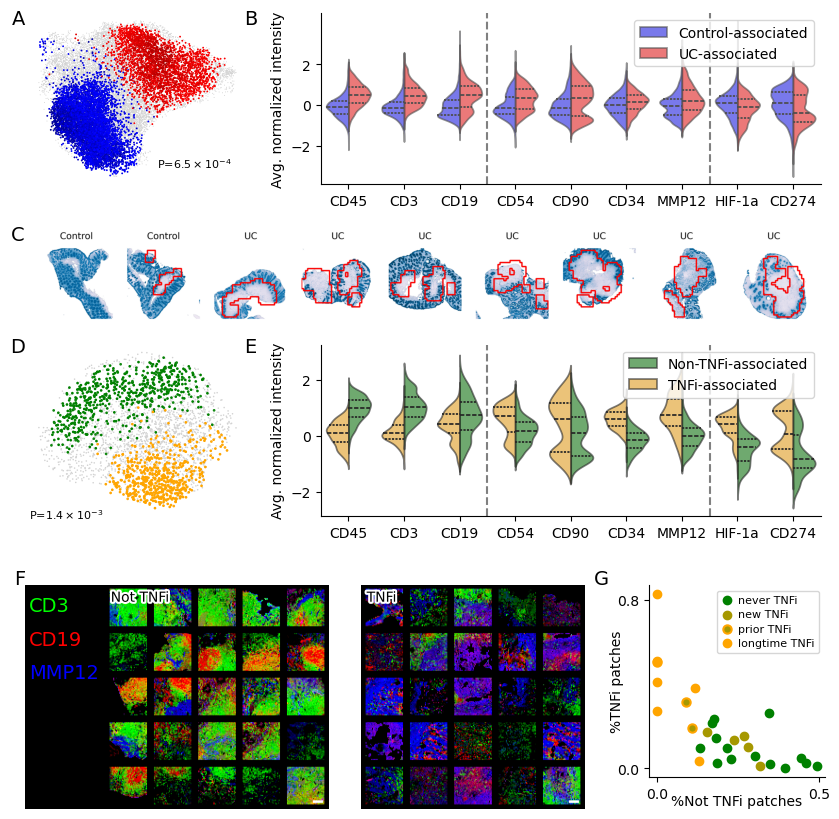

In [167]:
from matplotlib.gridspec import GridSpec

figsize = (8,8); ar = figsize[0]/figsize[1]
insetw = 0.28
fig = plt.figure(figsize=figsize, constrained_layout=True)
width_ratios = np.array([1, 1, 1])
height_ratios = np.array([1, 0.7, 1, 1.5])

gs = GridSpec(4, 3, width_ratios=width_ratios, height_ratios=height_ratios, figure=fig)
umap(fig.add_subplot(gs[0,0]))
markerplot(fig.add_subplot(gs[0,1:]), markers_to_plot)

sids = ['HC3','HC5','UC24','UC15','UC3','UC4b','UC6','UC2a','UC12']
spatialplot(fig.add_subplot(gs[1,:]), samples_m, sids, 'Cytokeratin', d.obs.ncorr_thresh > 0, ncols=len(sids))
umap_tnf(fig.add_subplot(gs[2,0]))
markerplot_tnf(fig.add_subplot(gs[2,1:]), markers_to_plot)

lastrow = fig.add_subplot(gs[3,:])
lastrow.axis('off')

small_color_legend(fig.add_axes([0, 0, 0.11, ar*insetw]), tbf_cmap)
mask = d.obs.index.isin(d_tnf.obs[d_tnf.obs.ncorr_thresh < 0].index)
clust_examples(fig.add_axes([0.1,0,insetw,ar*insetw]), mask, tbf_cmap, 'Not TNFi', nx=5, ny=5, seed=0)
mask = d.obs.index.isin(d_tnf.obs[d_tnf.obs.ncorr_thresh > 0].index)
clust_examples(fig.add_axes([0.42,0,insetw,ar*insetw]), mask, tbf_cmap, 'TNFi', nx=5, ny=5, seed=0)
cnascore(fig.add_axes([0.78,0.04,1-0.78,ar*insetw-0.04]))

# subpart labels
fig.text(0, 1, 'A', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0.29, 1, 'B', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0, 0.73, 'C', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0, 0.59, 'D', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0.29, 0.59, 'E', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0, ar*insetw+0.02, 'F', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')
fig.text(0.73, ar*insetw+0.02, 'G', fontsize=fs_figsubpanel, fontweight='medium', va='top', ha='right')

fig.savefig('../_main/fig.UC.pdf', bbox_inches='tight', dpi=800)
fig.show()

# Supp figures

## compare microniche correlation to UC between TNFi-associated and non-TNFi-associated patches

In [18]:
df = d_tnf.obs.copy()
df['uc_ncorr_thresh'] = d.obs.ncorr_thresh

/Users/yakir/miniconda3/envs/torch/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


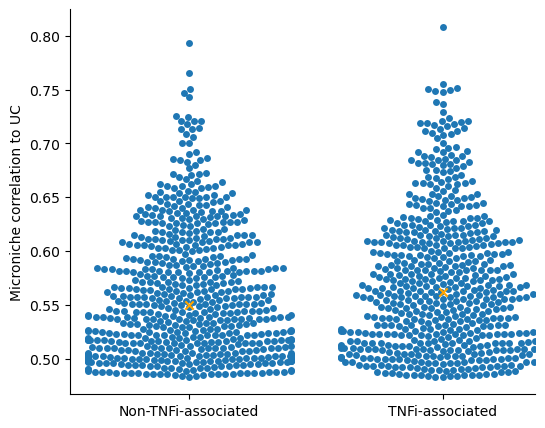

In [32]:
plt.figure(figsize=(6,5))
toplot = pd.DataFrame({
    'type':['Non-TNFi-associated']*(df.ncorr_thresh<0).sum() + ['TNFi-associated']*(df.ncorr_thresh > 0).sum(),
    'Microniche correlation to UC':np.concatenate([df[df.ncorr_thresh<0].uc_ncorr_thresh.values, df[df.ncorr_thresh>0].uc_ncorr_thresh.values])
})
sns.swarmplot(x=toplot['type'], y=toplot['Microniche correlation to UC'])
plt.scatter([0,1],
            [df[df.ncorr_thresh<0].uc_ncorr_thresh.median(),
            df[df.ncorr_thresh>0].uc_ncorr_thresh.median()], marker='x', color='orange', zorder=1000)
plt.xlabel('')
plt.gca().spines[['right','top']].set_visible(False)
plt.savefig('../_supp/fig.UC.UCvsTNFncorrs.png', dpi=500)
plt.show()

## UMAP showing clusters of patch fingerprints

<Figure size 500x400 with 0 Axes>

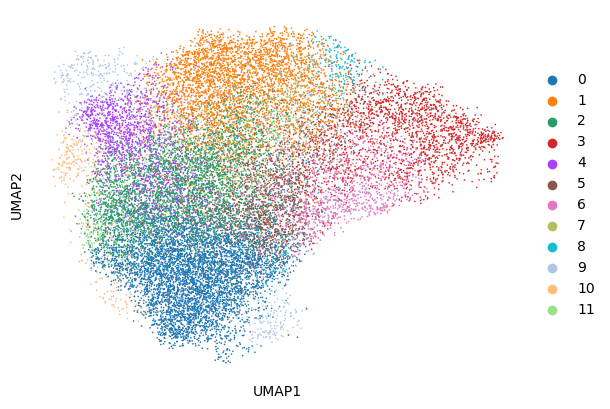

In [11]:
plt.figure(figsize=(5,4))
sc.pl.umap(d, color='leiden', show=False)
plt.gca().spines[:].set_visible(False)
plt.title('')
plt.savefig('../_supp/fig.UC.umap_with_clusters.png', dpi=500)
plt.show()

## cluster-based case-ctrl analyses

In [13]:
def volcano(ax, resultsfile):
    ttest = pd.read_csv(resultsfile)
    ax.scatter(ttest.stat, -np.log10(ttest.p), alpha=0.7)
    ax.axhline(y=-np.log10(0.05/len(ttest)), ls='--', color='gray')
    ax.axvline(x=0, ls='-', color='black')
    ax.set_xlabel('corr. to case/ctrl status', fontsize=fs_axislabel)
    ax.set_ylabel('$-\\log_{10}(P)$', fontsize=fs_axislabel)
    ax.spines[['right', 'top']].set_visible(False)

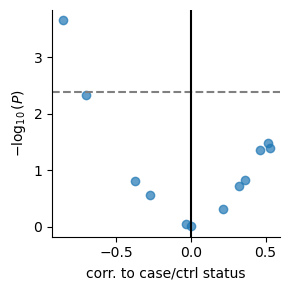

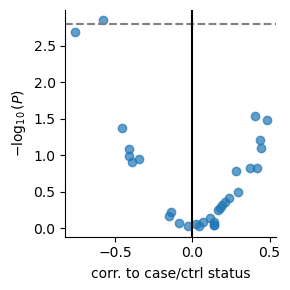

In [33]:
plt.figure(figsize=(3,3))
volcano(plt.gca(), '_results/patchfingerprints_clustertest.csv')
plt.tight_layout()
plt.savefig('../_supp/fig.UC.volcano_clusteredfingerprints.png', dpi=500)
plt.show()

plt.figure(figsize=(3,3))
volcano(plt.gca(), '_results/patchwideavgs_clustertest.csv')
plt.tight_layout()
plt.savefig('../_supp/fig.UC.volcano_clusteredpatchavgs.png', dpi=500)
plt.show()